### Model 


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm

import sklearn.preprocessing
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter


In [2]:
class Model(nn.Module):
    def __init__(self):
        size = 128
        super().__init__()
#         self.fc1 = nn.Linear(6, size)
        self.lstm1 = nn.LSTM(input_size=6, hidden_size=size, bidirectional=True)
        self.drop1 = nn.Dropout(p=0.25)
        self.lstm2 = nn.LSTM(input_size=size*2, hidden_size=size*2, bidirectional=True)
        self.drop2 = nn.Dropout(p=0.25)
        self.fc2 = nn.Linear(size*4, 2)

                    
    def forward(self, x):
#         x = self.fc1(x)
#         x = F.relu(x)
        x, _ = self.lstm1(x)
        x = self.drop1(x)
        x, _ = self.lstm2(x)
        x = self.drop2(x)
        x = self.fc2(x[:, -1, :])

        return x

### Dataset

In [3]:
import os
import pandas as pd
from torch.utils.data import Dataset

train_target_list = [
#     "IMU_1.csv", "IMU_2.csv", "IMU_3.csv",
#     "IMU_4.csv", "IMU_5.csv", "IMU_6.csv", 
#     "IMU_7.csv","IMU_8.csv", "IMU_9.csv", "IMU_10.csv",
#     'IMU_ronin_02.csv',
#     'IMU_ronin_11.csv','IMU_ronin_21.csv','IMU_ronin_31.csv',
#     'IMU_ronin_42.csv','IMU_ronin_51.csv','IMU_ronin_72.csv',
#     'IMU_ronin_92.csv','IMU_ronin_93.csv','IMU_ronin_101.csv',
#     'IMU_ronin_121.csv','IMU_ronin_152.csv','IMU_ronin_183.csv',
#     'IMU_ronin_201.csv','IMU_ronin_251.csv','IMU_ronin_263.csv',
#     'IMU_ronin_03.csv','IMU_ronin_04.csv', 'IMU_ronin_05.csv',
#     'IMU_ronin_06.csv','IMU_ronin_08.csv','IMU_ronin_09.csv','IMU_ronin_010.csv',
#     'IMU_ronin_13.csv','IMU_ronin_22.csv','IMU_ronin_32.csv','IMU_ronin_103.csv',
#     'IMU_ronin_113.csv','IMU_ronin_123.csv','IMU_ronin_131.csv','IMU_ronin_133.csv',
#     'IMU_ronin_141.csv','IMU_ronin_143.csv','IMU_ronin_151.csv','IMU_ronin_153.csv',
#     'IMU_ronin_163.csv','IMU_ronin_171.csv','IMU_ronin_203.csv','IMU_ronin_211.csv',
#     'IMU_ronin_223.csv','IMU_ronin_232.csv'
    
    "IMU_1.csv", "IMU_2.csv", "IMU_3.csv", "IMU_4.csv", "IMU_5.csv",
    "IMU_6.csv", "IMU_7.csv",
    "IMU_8.csv",
    "IMU_9.csv", "IMU_10.csv", 
    "IMU_11.csv", "IMU_12.csv", "IMU_13.csv", "IMU_14.csv", "IMU_15.csv",
    "IMU_16.csv", "IMU_17.csv", "IMU_18.csv", "IMU_19.csv", "IMU_20.csv", 
    "IMU_21.csv", "IMU_22.csv", "IMU_23.csv", "IMU_24.csv", 
    
#     "IMU_25.csv", 
    "IMU_26.csv", "IMU_27.csv", "IMU_28.csv",
    "IMU_29.csv", "IMU_30.csv",
    "IMU_31.csv", "IMU_32.csv", "IMU_33.csv", "IMU_34.csv", "IMU_35.csv", 
    "IMU_36.csv", "IMU_37.csv", "IMU_38.csv", 
    "IMU_39.csv", 
    "IMU_40.csv",
    "IMU_41.csv", "IMU_42.csv", "IMU_43.csv", "IMU_44.csv", "IMU_45.csv", 
    "IMU_46.csv", "IMU_47.csv", "IMU_48.csv", "IMU_49.csv", "IMU_50.csv",
#     "IMU_51.csv", "IMU_52.csv", "IMU_53.csv", "IMU_54.csv", "IMU_55.csv", 
#     "IMU_56.csv", "IMU_57.csv", "IMU_58.csv", "IMU_59.csv", "IMU_60.csv",
#     "IMU_61.csv", "IMU_62.csv", "IMU_63.csv", "IMU_64.csv", "IMU_65.csv", 
#     "IMU_66.csv", "IMU_67.csv", "IMU_68.csv", "IMU_69.csv", "IMU_70.csv",
#     "IMU_71.csv"
]
train_features_list = [
#     ["n_imu1.csv"], ["n_imu2.csv"], ["n_imu3.csv"], ["n_imu4.csv"],
#     ["n_imu5.csv"], ["n_imu6.csv"], 
#     ["n_imu7.csv"], ["n_imu8.csv"],["n_imu9.csv"], ["n_imu10.csv"],
#     ["acc_gyro_ronin_02.csv"],["acc_gyro_ronin_11.csv"],
#     ["acc_gyro_ronin_21.csv"],["acc_gyro_ronin_31.csv"],["acc_gyro_ronin_42.csv"],
#     ["acc_gyro_ronin_51.csv"],["acc_gyro_ronin_72.csv"],["acc_gyro_ronin_92.csv"],
#     ["acc_gyro_ronin_93.csv"],["acc_gyro_ronin_101.csv"],["acc_gyro_ronin_121.csv"],
#     ["acc_gyro_ronin_152.csv"],["acc_gyro_ronin_183.csv"],["acc_gyro_ronin_201.csv"],
#     ["acc_gyro_ronin_251.csv"],["acc_gyro_ronin_263.csv"],
#     ['acc_gyro_ronin_03.csv'],['acc_gyro_ronin_04.csv'], ['acc_gyro_ronin_05.csv'],
#     ['acc_gyro_ronin_06.csv'],['acc_gyro_ronin_08.csv'],['acc_gyro_ronin_09.csv'],['acc_gyro_ronin_010.csv'],
#     ['acc_gyro_ronin_13.csv'],['acc_gyro_ronin_22.csv'],['acc_gyro_ronin_32.csv'],['acc_gyro_ronin_103.csv'],
#     ['acc_gyro_ronin_113.csv'],['acc_gyro_ronin_123.csv'],['acc_gyro_ronin_131.csv'],['acc_gyro_ronin_133.csv'],
#     ['acc_gyro_ronin_141.csv'],['acc_gyro_ronin_143.csv'],['acc_gyro_ronin_151.csv'],['acc_gyro_ronin_153.csv'],
#     ['acc_gyro_ronin_163.csv'],['acc_gyro_ronin_171.csv'],['acc_gyro_ronin_203.csv'],['acc_gyro_ronin_211.csv'],
#     ['acc_gyro_ronin_223.csv'],['acc_gyro_ronin_232.csv']
    
    ["n_imu1.csv"], ["n_imu2.csv"], ["n_imu3.csv"], ["n_imu4.csv"],["n_imu5.csv"],
    ["n_imu6.csv"], ["n_imu7.csv"], 
    ["n_imu8.csv"],
    ["n_imu9.csv"],["n_imu10.csv"],
    ["n_imu11.csv"], ["n_imu12.csv"], ["n_imu13.csv"], ["n_imu14.csv"],["n_imu15.csv"],
    ["n_imu16.csv"], ["n_imu17.csv"], ["n_imu18.csv"], ["n_imu19.csv"],["n_imu20.csv"],
    ["n_imu21.csv"], ["n_imu22.csv"], ["n_imu23.csv"], ["n_imu24.csv"],
    
#     ["n_imu25.csv"],
    ["n_imu26.csv"], ["n_imu27.csv"], ["n_imu28.csv"],
    ["n_imu29.csv"],["n_imu30.csv"],
    ["n_imu31.csv"], ["n_imu32.csv"], ["n_imu33.csv"], ["n_imu34.csv"],["n_imu35.csv"],
    
    ["n_imu36.csv"], ["n_imu37.csv"], ["n_imu38.csv"], 
    ["n_imu39.csv"],
    ["n_imu40.csv"],
    ["n_imu41.csv"], ["n_imu42.csv"], ["n_imu43.csv"], ["n_imu44.csv"],["n_imu45.csv"],
    ["n_imu46.csv"], ["n_imu47.csv"], ["n_imu48.csv"], ["n_imu49.csv"],["n_imu50.csv"],
#     ["n_imu51.csv"], ["n_imu52.csv"], ["n_imu53.csv"], ["n_imu54.csv"],["n_imu55.csv"],
#     ["n_imu56.csv"], ["n_imu57.csv"], ["n_imu58.csv"], ["n_imu59.csv"],["n_imu60.csv"],
#     ["n_imu61.csv"], ["n_imu62.csv"], ["n_imu63.csv"], ["n_imu64.csv"],["n_imu65.csv"],
#     ["n_imu66.csv"], ["n_imu67.csv"], ["n_imu68.csv"], ["n_imu69.csv"],["n_imu70.csv"],
#     ["n_imu71.csv"]
]

test_target_list = ["IMU_25.csv"]
test_features_list = [["n_imu25.csv"]]


class TESNamesDataset(Dataset):
    def __init__(self, target_list, features_list):
        self.target_list = target_list
        self.features_list = features_list
    
        self.dataset = pd.DataFrame()

        for i in range(len(self.features_list)):
            y = pd.read_csv(f'./data2/{self.target_list[i]}', header=None, names=['delta_l', 'delta_phi'])
            y['idx'] = range(y.shape[0])
            for feature_table_name in self.features_list[i]:
                X = pd.read_csv(f'./data2/{feature_table_name}', header=None, names=[f'x_{j}' for j in range(1,7)])
                X['idx'] = [item for idx in range(y.shape[0]) for item in [idx]*200]
                df = X.merge(y, on='idx')
                self.dataset = pd.concat([self.dataset, df])

        # calculating number of objects
        self.number_of_objects = self.dataset.shape[0] // 200
        
        # saving elements into array
        self.data = []
        for i in tqdm(range(self.number_of_objects)):
            obj = self.dataset.iloc[i*200:(i+1)*200]
            self.data += [(
                torch.from_numpy(obj[[f'x_{j}' for j in range(1,7)]].values).float(),
                torch.from_numpy(obj[['delta_l', 'delta_phi']].iloc[0].values).float()    
            )]
        
        # Delete memory consuming dataset        
        del self.dataset

    def __len__(self):
        return self.number_of_objects

    def __getitem__(self, idx):
        return self.data[idx]

#### Training with TensorBoard

In [4]:
def my_loss(output, target):
    loss = torch.mean((target[:, 0] - output[:, 0])**2 + 4 * (target[:, 1] - output[:, 1])**2)
    return loss

def calculate_test_error(model, dataloader):
    num_batches = len(dataloader)
    test_loss = 0

    with torch.no_grad():
        for X, y in dataloader:
            
            # send X,y to GPU (or CPU if GPU is not availiable)     
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += my_loss(pred, y).item()
    return test_loss / num_batches

In [5]:
learning_rate = 1e-4
batch_size = 100
epochs = 33

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lstm = Model().float().to(device)

train_data = TESNamesDataset(train_target_list, train_features_list)
test_data = TESNamesDataset(test_target_list, test_features_list)

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

100%|██████████| 3282/3282 [00:04<00:00, 737.28it/s]


In [6]:
writer = SummaryWriter('runs/trajectory_experiment_100_batch_33_epochs_50_track_2_lstm_2_0_drop_acc_gyro')
running_loss = 0.0
for epoch in range(epochs):  # loop over the dataset multiple times

    print(f'Current epoch = {epoch}', end='\r')
    
    for i, data in tqdm(enumerate(train_dataloader, 0)):
        
        # get the inputs; data is a list of [inputs, labels]
        X, y = data
        
        # send X,y to GPU (or CPU if GPU is not availiable)     
        X, y = X.to(device), y.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = lstm(X)
        loss = my_loss(outputs, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 500 == 499: # every 500 mini-batches...

            # log the running train loss
            writer.add_scalar(
                'training loss',
                running_loss / 500,
                epoch * len(train_dataloader) + i
            )
            running_loss = 0.0
            
            # log the running test loss
            test_loss = calculate_test_error(lstm, test_dataloader)
            writer.add_scalar(
                'test loss',
                test_loss,
                epoch * len(train_dataloader) + i
            )

            
#     log a Matplotlib Figure showing the model's prediction on test data
#     writer.add_figure(
#         'test trajectory',
#         plot_test_trajectory(lstm, test_dataloader),
#         global_step=epoch * len(train_dataloader) + i
#     )
            
print('Finished Training')

0it [00:00, ?it/s]

2201it [04:04,  8.99it/s]
0it [00:00, ?it/s]

2201it [05:36,  6.53it/s]
1it [00:00,  6.60it/s]

2201it [05:47,  6.33it/s]
1it [00:00,  6.87it/s]

2201it [05:30,  6.67it/s]
1it [00:00,  7.48it/s]

2201it [04:48,  7.63it/s]
1it [00:00,  7.90it/s]

2201it [04:45,  7.70it/s]
1it [00:00,  8.64it/s]

2201it [04:38,  7.89it/s]
1it [00:00,  8.02it/s]

2201it [04:34,  8.01it/s]
1it [00:00,  7.32it/s]

2201it [04:42,  7.79it/s]
1it [00:00,  7.66it/s]

2201it [04:45,  7.71it/s]
1it [00:00,  6.60it/s]

2201it [04:40,  7.84it/s]
1it [00:00,  8.08it/s]

2201it [04:37,  7.94it/s]
1it [00:00,  7.88it/s]

2201it [04:41,  7.83it/s]
1it [00:00,  8.22it/s]

2201it [04:47,  7.66it/s]
1it [00:00,  7.32it/s]

2201it [04:48,  7.63it/s]
1it [00:00,  8.15it/s]

2201it [04:43,  7.77it/s]
1it [00:00,  7.77it/s]

2201it [04:43,  7.77it/s]
1it [00:00,  7.43it/s]

2201it [04:54,  7.47it/s]
1it [00:00,  8.09it/s]

2201it [04:52,  7.52it/s]
1it [00:00,  7.83it/s]

2201it [04:43,  7.76it/s]
1it [00:00,  7.60it/s]

2201it [04:45,  7.71it/s]
1it [00:00,  7.60it/s]

2201it [04:43,  7.76it/s]
1it [00:00,  8.57it/s]

2201it [04:38,  7.91it/s]
1it [00:00,  7.71it/s]

2201it [04:38,  7.90it/s]
1it [00:00,  8.02it/s]

2201it [04:36,  7.97it/s]
1it [00:00,  7.54it/s]

2201it [04:49,  7.61it/s]
1it [00:00,  8.08it/s]

2201it [04:43,  7.77it/s]
1it [00:00,  7.60it/s]

2201it [04:38,  7.91it/s]
1it [00:00,  8.15it/s]

2201it [04:36,  7.96it/s]
1it [00:00,  8.15it/s]

2201it [04:36,  7.97it/s]
1it [00:00,  8.28it/s]

2201it [04:40,  7.84it/s]
1it [00:00,  7.71it/s]

2201it [04:39,  7.86it/s]
1it [00:00,  7.96it/s]

2201it [04:37,  7.94it/s]

Finished Training


100%|██████████| 1511/1511 [00:02<00:00, 711.62it/s]


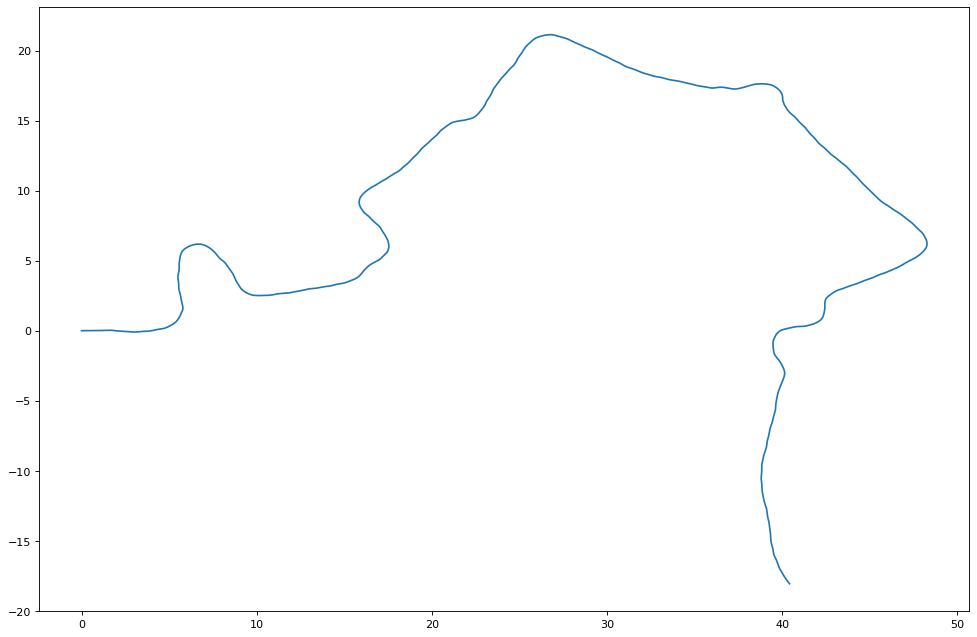

In [56]:
import numpy as np, matplotlib.pyplot as plt

def kek(lstm, test_dataloader):
    size = len(test_dataloader.dataset)
    mas=np.zeros(shape=(size,2))
    num_batches = len(test_dataloader)
    test_loss, correct = 0, 0
    i = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred = lstm(X)
            mas[i,:] = pred.cpu().numpy()
            i+=1
    return mas
def plot_test_trajectory(d):
    y_delta_l = d[:,0]
    y_delta_psi = d[:,1]

    init_l = np.array([0.0, 0.0])
    init_psi = 0.0
    cur_psi = init_psi

    xy=np.zeros(shape=(y_delta_l.shape[0]+1,2))
    xy[0,:] = init_l

    for i in range(y_delta_l.shape[0]):
        cur_psi = cur_psi + y_delta_psi[i]
        xy[i+1,0] = xy[i,0] + y_delta_l[i] * np.cos(cur_psi)
        xy[i+1,1] = xy[i,1] - y_delta_l[i] * np.sin(cur_psi)
    figure(figsize=(15, 10), dpi=80)
    plt.plot(xy[:,0], xy[:,1])

test1_target_list = ["IMU_51.csv"]
test1_features_list = [["n_imu51.csv"]]
test1_data = TESNamesDataset(test1_target_list, test1_features_list)
test1_dataloader = DataLoader(test1_data, batch_size=1, shuffle=False)
# plot_test_trajectory(lstm, test1_dataloader)
data = kek(lstm, test1_dataloader)
plot_test_trajectory(data)
# tr = plot_test_trajectory(lstm, test1_dataloader)
# print(len(test1_dataloader.dataset))

100%|██████████| 1162/1162 [00:01<00:00, 871.43it/s]


(1161, 2)


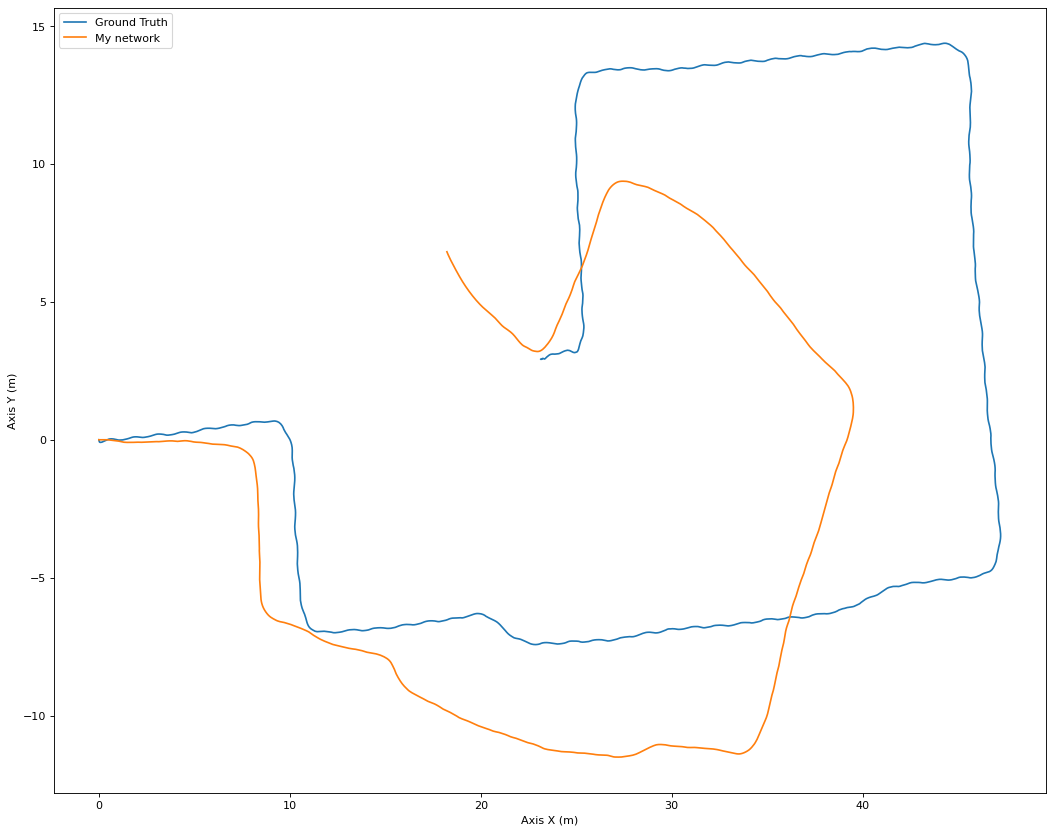

In [70]:
from matplotlib.pyplot import figure
import numpy as np, matplotlib.pyplot as plt

def plot_test_trajectory(lstm, test_dataloader):
    size = len(test_dataloader.dataset)
    mas=np.zeros(shape=(size,2))
    num_batches = len(test_dataloader)
    test_loss, correct = 0, 0
    i = 0
    with torch.no_grad():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            pred = lstm(X)
            if (pred.shape[0] == 100):
                mas[i*100:100*(i+1),:] = pred.cpu().numpy()
                i+=1
            else:
                mas[i*100:,:] = pred.cpu().numpy()
    
    d = mas
    y_delta_l = d[:,0]
    y_delta_psi = d[:,1]

    init_l = np.array([0, 0])
    init_psi = 0
    cur_psi = init_psi

    xy=np.zeros(shape=(y_delta_l.shape[0]+1,2))
    xy[0,:] = init_l

    for i in range(y_delta_l.shape[0]):
        cur_psi = cur_psi + y_delta_psi[i]
        xy[i+1,0] = xy[i,0] + y_delta_l[i] * np.cos(cur_psi)
        xy[i+1,1] = xy[i,1] + y_delta_l[i] * np.sin(cur_psi)
    return xy

test1_target_list = ["IMU_64.csv"]
test1_features_list = [["n_imu64.csv"]]
test1_data = TESNamesDataset(test1_target_list, test1_features_list)
test1_dataloader = DataLoader(test1_data, batch_size=batch_size, shuffle=False)
tr = plot_test_trajectory(lstm, test1_dataloader)


d = pd.read_csv("data2/IMU_64.csv").values
print(d.shape)
y_delta_l = d[:,0]
y_delta_psi = d[:,1]

init_l = np.array([0, 0])
init_psi = 3.3
cur_psi = init_psi

xy=np.zeros(shape=(y_delta_l.shape[0]+1,2))
xy[0,:] = init_l

for i in range(y_delta_l.shape[0]):
    cur_psi = cur_psi + y_delta_psi[i]
    xy[i+1,0] = xy[i,0] + y_delta_l[i] * np.cos(cur_psi)
    xy[i+1,1] = xy[i,1] + y_delta_l[i] * np.sin(cur_psi)

figure(figsize=(16, 13), dpi=80)
plt.plot(xy[:,0], xy[:,1])
plt.plot(tr[:,0], tr[:,1])
plt.xlabel('Axis X (m)')
plt.ylabel('Axis Y (m)')
plt.legend(['Ground Truth','My network', 'IoNET'])

In [17]:
print("Model's state_dict:")
for param_tensor in lstm.state_dict():
    print(param_tensor, "\t", lstm.state_dict()[param_tensor].size())

Model's state_dict:
lstm1.weight_ih_l0 	 torch.Size([512, 6])
lstm1.weight_hh_l0 	 torch.Size([512, 128])
lstm1.bias_ih_l0 	 torch.Size([512])
lstm1.bias_hh_l0 	 torch.Size([512])
lstm1.weight_ih_l0_reverse 	 torch.Size([512, 6])
lstm1.weight_hh_l0_reverse 	 torch.Size([512, 128])
lstm1.bias_ih_l0_reverse 	 torch.Size([512])
lstm1.bias_hh_l0_reverse 	 torch.Size([512])
lstm2.weight_ih_l0 	 torch.Size([1024, 256])
lstm2.weight_hh_l0 	 torch.Size([1024, 256])
lstm2.bias_ih_l0 	 torch.Size([1024])
lstm2.bias_hh_l0 	 torch.Size([1024])
lstm2.weight_ih_l0_reverse 	 torch.Size([1024, 256])
lstm2.weight_hh_l0_reverse 	 torch.Size([1024, 256])
lstm2.bias_ih_l0_reverse 	 torch.Size([1024])
lstm2.bias_hh_l0_reverse 	 torch.Size([1024])
fc2.weight 	 torch.Size([2, 512])
fc2.bias 	 torch.Size([2])
